In [292]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

pd.set_option('max_colwidth', 400)

In [293]:
import os
rootdir = './arabic-dataset/'
rows = []
for subdir, dirs, files in os.walk(rootdir):
   
   count = 0
   for file in files:
      
      filename = os.fsdecode(file)
      
      if count ==10:
         count=0

      if filename.endswith('.properties'):
         with open(os.path.join(subdir, file),'r') as f:
            data1 = f.readlines()
            # row['author'] = data1[1].split('=')[1][0]
            with open(os.path.join(subdir, 'sample' + str(count)+'.txt')) as f1:
               data = f1.read()

               # Split Each text file to be 100 words each row
               data_words = data.split(' ')
               for i in range(100,len(data_words),100):
                  row = {'author':data1[1].split('=')[1][0]}
                  if i +100 >len(data_words):
                     row['text'] = ' '.join(data_words[i-100:len(data_words)])
                     rows.append(row)
                     break
                  else:
                     row['text'] = ' '.join(data_words[i-100:i])
                     rows.append(row)
                  

               row['text'] = str(data)
               count+=1

In [294]:
rows[0]

{'author': '0',
 'text': 'أعلنت قوات حكومة "الوفاق" الليبية، اليوم الأحد، بدء المرحلة الثانية من عملية "بركان الغضب"، مشيرة إلى أنّها انتقلت من الدفاع إلى الهجوم على مواقع قوات اللواء المتقاعد خليفة حفتر، جنوب العاصمة طرابلس.\nوقال اللواء أحمد بوشحمة، آمر غرفة العمليات الميدانية لعملية "بركان الغضب" التابعة لحكومة "الوفاق"، لـ"العربي الجديد"، إنّ "عملية الهجوم بالتنسيق بين كل محاور القتال بدأت، منذ منتصف أمس السبت، وبشكل منظم"، مؤكداً "إحراز قوات الحكومة تقدمات مهمة في أكثر من محور".\n\nوأضاف أنّ "العمليات الهجومية وصلت إلى ذروتها، خلال الساعات الماضية من ليل السبت"، مشيراً إلى أنّ "الهدوء حالياً يسود كافة المحاور، وسط استعدادات لعمليات أخرى أكثر حدة".\n\nوأكد أنّ "ساعة'}

In [295]:
df = pd.DataFrame.from_dict(rows, orient='columns')

df.shape

(357, 2)

In [296]:
df.head(40)

,author,text
0,0,"أعلنت قوات حكومة ""الوفاق"" الليبية، اليوم الأحد، بدء المرحلة الثانية من عملية ""بركان الغضب""، مشيرة إلى أنّها انتقلت من الدفاع إلى الهجوم على مواقع قوات اللواء المتقاعد خليفة حفتر، جنوب العاصمة طرابلس.\nوقال اللواء أحمد بوشحمة، آمر غرفة العمليات الميدانية لعملية ""بركان الغضب"" التابعة لحكومة ""الوفاق""، لـ""العربي الجديد""، إنّ ""عملية الهجوم بالتنسيق بين كل محاور القتال بدأت، منذ منتصف أمس السبت، وبش..."
1,0,"الصفر لعملية دحر قوات حفتر من جنوب العاصمة قد أطلقت، والأيام المقبلة ستكون حاسمة"".\n\nوأعلن حفتر، في 4 إبريل/نيسان الماضي، إطلاق عملية عسكرية لاقتحام طرابلس، بينما ردّت حكومة ""الوفاق"" المعترف بها دولياً، بإطلاق عملية ""بركان الغضب""، لوقف أي اعتداء على العاصمة الليبية.\n\nودعت الأمم المتحدة، عشية شهر رمضان، إلى هدنة إنسانية لمدة أسبوع، غير أنّ حفتر تجاهل هذه الدعوة، على الرغم من أنّ قواته لم تتم..."
2,0,"شخص.\n\nفي غضون ذلك، تناقلت وسائل إعلام، فيديوهات وصوراً تظهر حطام طائرة مسيّرة تحمل علم دولة الإمارات، قالت إن قوات عملية ""بركان الغضب"" أسقطتها، فجر اليوم الأحد، جنوب طرابلس.\n\n\n\n\nوأكد بوشحمة أنّ هجوم الساعات الماضية على محاور قتال قوات حفتر، أسفر عن تدمير عدد من الآليات العسكرية؛ من بينها مدرعة ""تايغر"" إماراتية، بالإضافة إلى شنّ سلاح الجو غارتين على مواقع لحفتر في مدينة غريان غربي طرابلس..."
3,0,"أعلنت قوات حكومة ""الوفاق"" الليبية، اليوم الأحد، بدء المرحلة الثانية من عملية ""بركان الغضب""، مشيرة إلى أنّها انتقلت من الدفاع إلى الهجوم على مواقع قوات اللواء المتقاعد خليفة حفتر، جنوب العاصمة طرابلس.\nوقال اللواء أحمد بوشحمة، آمر غرفة العمليات الميدانية لعملية ""بركان الغضب"" التابعة لحكومة ""الوفاق""، لـ""العربي الجديد""، إنّ ""عملية الهجوم بالتنسيق بين كل محاور القتال بدأت، منذ منتصف أمس السبت، وبش..."
4,0,تجاوز الهجوم العسكري الذي تشنّه مليشيات اللواء خليفة حفتر على العاصمة الليبية طرابلس الشهرين، منذ انطلاقه في 4 إبريل/نيسان الماضي، من دون أن يحقق تقدّماً عسكرياً كبيراً. كما لم تنجح قوات حكومة الوفاق في طرد المليشيات من المواقع التي سيطرت عليها في القطاع الجنوبي للعاصمة.\n\nوعلى الرغم من تأكيدات الطرفين وإصرارهما على أن كلاً منهما أحرز تقدّماً باتجاه مناطق سيطرة الآخر، إلا أن مراقبين ليبيين يع...
5,0,"نزحوا من منازلهم من أحياء جنوب العاصمة جراء القتال المستمر.\n\n\n""\n85 ألف شخص نزحوا من منازلهم من أحياء جنوب العاصمة جراء القتال المستمر\n\n""\nوأكد المتحدث باسم عملية ""بركان الغضب"" التابعة لحكومة الوفاق، محمد قنونو، في حديث لـ""العربي الجديد""، أن المرحلة الثانية من المعركة تسير وفق الخطط الموضوعة، لافتاً إلى أن قوات الحكومة في حالة هجوم على مواقع مليشيات حفتر. وقال قنونو إن المرحلة الثانية من ..."
6,0,"ساعات صباح أمس الخميس، فإن قنونو قال ""إننا لم نحقق تقدّماً (خلال اليومين الماضيين)، لأننا كنا نصد هجوماً للمليشيات التي كانت تريد استغلال أيام عيد الفطر لاستعادة مواقع فقدتها في الأيام الماضية"".\n\nفي المقابل، ومع غياب تصريحات المتحدث الرسمي باسم مليشيات حفتر، أحمد المسماري، خلال الأيام الثلاثة الماضية، إلا أن نشرات شعبة الإعلام الحربي التابعة لمليشيات حفتر أشارت إلى تقدّم في محور قصر بن غشير،..."
7,0,"عدة مواقع بطرابلس وغربها. وأوضح المجعي، في حديثه، لـ""العربي الجديد""، أن طيران حفتر شن غارة صباح أمس الخميس على مستشفى ميداني بمنطقة السواني جنوب طرابلس، وغارة أخرى على مقر الفروسية قرب مدينة الزاوية غرب العاصمة. وأضاف أن ""قوات حفتر تريد أن تبعث برسالة تشير إلى أنها في موقف قوة ويمكنها الوصول إلى أي موقع في طرابلس"" مشيراً إلى أن الغارات لم تؤد إلى وقوع إصابات. وعن استهداف مطار معيتيقة المدني قا..."
8,0,منذ منتصف الشهر الأول لبدء المواجهات. فالقوات التابعة للحكومة لا تزال تسيطر على مناطق السواني والعزيزية والساعدية، وصولاً إلى الهيرة المحاذية لمدينة غريان (95 كيلومتراً غرب طرابلس)، لكنها تقتسم السيطرة مع مليشيات حفتر في مناطق قصر بن غشير ووادي الربيع وطريق المطار وعين زارة. وفي هذه الأحياء، تتركز سيطرة مليشيات حفتر في المواقع العسكرية، إذ تعتبر منطقة القطاع الجنوبي الأكثر انتشاراً للمواقع الع...
9,0,"الخبير الأمني الليبي، محيي الدين زكري، في حديث لـ""العربي الجديد""، أن الوضع الميداني في المنطقة يعيش حالة مراوحة، والمعارك فيها تتخذ شكل الكر والفر بين الطرفين. وقال زكري إن قوات الحكومة تمكّنت بالفعل من الانتقال من الدفاع إلى الهجوم بعد التعزيزات العسكرية التي لم يتوقف قدومها إلى جنوب ط

In [297]:
import re

df['text']= df['text'].apply(lambda x: re.sub('[^ا-ي\s]','',x))



In [298]:
MAX_FEATURES = 1000
NUM_CLASSES = 9

In [299]:
from nltk.corpus import stopwords
X = df['text']
Y = df['author']

vectorizer = TfidfVectorizer(max_features=MAX_FEATURES,stop_words=stopwords.words('arabic'))
X = vectorizer.fit_transform(X).toarray()
Y = Y.to_numpy()


c:\Users\Eldeeb\.conda\envs\env_2\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(


In [300]:
X = np.array(X,dtype=np.float32)
Y = np.array(Y,dtype=np.int64)
X.shape , Y.shape

((357, 1000), (357,))

In [301]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
Y = le.fit_transform(Y)

In [302]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [303]:
features = vectorizer.get_feature_names_out()
df_post_processing = pd.DataFrame(X,columns=features).head()
df_post_processing.head()

,اتخاذ,اتفاق,اجتماع,ارتفاع,استخدام,استغلال,استفتا,استقرار,استمرار,استهداف,...,يقوم,يكد,يكن,يكون,يمثل,يمكن,ينجح,يوبيك,يوجد,يوم
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.904035,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [304]:
import numpy as np  

train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_ratio)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


x_train =x_train.reshape(-1,MAX_FEATURES,1)

print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(249, 1000, 1) (54, 1000) (54, 1000)
(249,) (54,) (54,)


In [305]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
torch.manual_seed(0)
import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



In [306]:
BATCH_SIZE = 32
train_dl = torch.utils.data.DataLoader(dataset= list(zip(x_train,y_train)), shuffle=True)
val_dl = torch.utils.data.DataLoader(dataset= list(zip(x_val,y_val)), shuffle=True)
# test_dl = torch.utils.data.DataLoader(dataset= list(zip(x_test,y_test)), shuffle=True)

In [307]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(MAX_FEATURES,512)
        self.fc2 = nn.Linear(512,128)
        self.fc3 = nn.Linear(128,NUM_CLASSES)

    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(),lr=0.0001,weight_decay=1e-5)

num_epochs = 30

epochs= tqdm.tqdm(range(num_epochs))
n_total_steps = len(train_dl)

trainingEpoch_loss = []
validationEpoch_loss = []
train_acc_history = []
val_acc_history = []

for epoch in epochs:
    train_loss = []
    model.train()

    n_correct = 0
    n_samples = 0
    for i,batch in enumerate(train_dl):
        input = batch[0].reshape(-1, MAX_FEATURES).to(device)
        label= batch[1].to(device)
        # Forward-pass
        output = model(input)
        loss = criterion(output,label)
        
        # Backward-pass and optimize
        optim.zero_grad()
        loss.backward()
        optim.step()
        train_loss.append(loss.item())

        _, pred = torch.max(output,1)
        n_samples += label.shape[0]
        n_correct += (pred == label).sum().item()

    train_acc= 100.0 * n_correct / n_samples
    train_acc_history.append(train_acc)
    loss_now = np.mean(train_loss)
    trainingEpoch_loss.append(loss_now)
    model.eval()     

    n_correct = 0
    n_samples = 0
    for i, batch in enumerate(val_dl):
        validationStep_loss = []
        input = batch[0].reshape(-1, MAX_FEATURES).to(device)    
        label= batch[1].to(device)
        # Forward Pass
        outputs = model(input)
        # Find the Loss
        validation_loss = criterion(outputs, label)
        # Calculate Loss
        validationStep_loss.append(validation_loss.item())

        _, pred = torch.max(outputs,1)
        n_samples += label.shape[0]
        n_correct += (pred == label).sum().item()

    val_acc= 100.0 * n_correct / n_samples
    val_acc_history.append(val_acc)
    validationEpoch_loss.append(np.array(validationStep_loss).mean())
    epochs.set_postfix({"loss": loss.item(), "val_loss": validation_loss.item(),"train_acc": train_acc,"val_acc": val_acc})
    print(epochs)


  0%|          | 0/60 [00:00<?, ?it/s]

  2%|▏         | 1/60 [00:00<00:46,  1.27it/s, loss=2.21, val_loss=2.24, train_acc=12.4, val_acc=18.5]

  0%|          | 0/60 [00:00<?, ?it/s, loss=2.21, val_loss=2.24, train_acc=12.4, val_acc=18.5]


  3%|▎         | 2/60 [00:01<00:39,  1.47it/s, loss=2.24, val_loss=2.07, train_acc=32.9, val_acc=33.3]

  2%|▏         | 1/60 [00:01<00:46,  1.27it/s, loss=2.24, val_loss=2.07, train_acc=32.9, val_acc=33.3]


  5%|▌         | 3/60 [00:02<00:37,  1.53it/s, loss=2.21, val_loss=2.27, train_acc=44.6, val_acc=35.2]

  3%|▎         | 2/60 [00:02<00:39,  1.47it/s, loss=2.21, val_loss=2.27, train_acc=44.6, val_acc=35.2]


  7%|▋         | 4/60 [00:02<00:35,  1.56it/s, loss=2.12, val_loss=2.47, train_acc=46.6, val_acc=40.7]

  5%|▌         | 3/60 [00:02<00:37,  1.53it/s, loss=2.12, val_loss=2.47, train_acc=46.6, val_acc=40.7]


  8%|▊         | 5/60 [00:03<00:34,  1.58it/s, loss=1.26, val_loss=2.23, train_acc=59.4, val_acc=55.6]

  7%|▋         | 4/60 [00:03<00:35,  1.56it/s, loss=1.26, val_loss=2.23, train_acc=59.4, val_acc=55.6]


 10%|█         | 6/60 [00:03<00:32,  1.67it/s, loss=1.15, val_loss=2.03, train_acc=81.5, val_acc=72.2]

  8%|▊         | 5/60 [00:03<00:34,  1.58it/s, loss=1.15, val_loss=2.03, train_acc=81.5, val_acc=72.2]


 12%|█▏        | 7/60 [00:04<00:31,  1.70it/s, loss=1.11, val_loss=1.76, train_acc=93.6, val_acc=83.3]

 10%|█         | 6/60 [00:04<00:32,  1.67it/s, loss=1.11, val_loss=1.76, train_acc=93.6, val_acc=83.3]


 13%|█▎        | 8/60 [00:04<00:30,  1.70it/s, loss=1.06, val_loss=0.00847, train_acc=98.8, val_acc=90.7]

 12%|█▏        | 7/60 [00:04<00:31,  1.70it/s, loss=1.06, val_loss=0.00847, train_acc=98.8, val_acc=90.7]


 15%|█▌        | 9/60 [00:05<00:29,  1.75it/s, loss=0.0124, val_loss=0.068, train_acc=100, val_acc=90.7] 

 13%|█▎        | 8/60 [00:05<00:30,  1.70it/s, loss=0.0124, val_loss=0.068, train_acc=100, val_acc=90.7]


 17%|█▋        | 10/60 [00:06<00:28,  1.77it/s, loss=0.148, val_loss=1.86, train_acc=100, val_acc=92.6] 

 15%|█▌        | 9/60 [00:06<00:29,  1.75it/s, loss=0.148, val_loss=1.86, train_acc=100, val_acc=92.6]


 18%|█▊        | 11/60 [00:06<00:27,  1.79it/s, loss=0.216, val_loss=0.189, train_acc=100, val_acc=94.4]

 17%|█▋        | 10/60 [00:06<00:28,  1.77it/s, loss=0.216, val_loss=0.189, train_acc=100, val_acc=94.4]


 20%|██        | 12/60 [00:07<00:26,  1.81it/s, loss=0.127, val_loss=0.129, train_acc=100, val_acc=96.3]

 18%|█▊        | 11/60 [00:07<00:27,  1.79it/s, loss=0.127, val_loss=0.129, train_acc=100, val_acc=96.3]


 22%|██▏       | 13/60 [00:07<00:25,  1.81it/s, loss=0.00129, val_loss=0.108, train_acc=99.6, val_acc=94.4]

 20%|██        | 12/60 [00:07<00:26,  1.81it/s, loss=0.00129, val_loss=0.108, train_acc=99.6, val_acc=94.4]


 23%|██▎       | 14/60 [00:08<00:26,  1.77it/s, loss=0.00506, val_loss=0.0273, train_acc=100, val_acc=94.4]

 22%|██▏       | 13/60 [00:08<00:25,  1.81it/s, loss=0.00506, val_loss=0.0273, train_acc=100, val_acc=94.4]


 25%|██▌       | 15/60 [00:08<00:25,  1.77it/s, loss=0.00102, val_loss=0.0057, train_acc=100, val_acc=96.3]

 23%|██▎       | 14/60 [00:08<00:26,  1.77it/s, loss=0.00102, val_loss=0.0057, train_acc=100, val_acc=96.3]


 27%|██▋       | 16/60 [00:09<00:24,  1.78it/s, loss=0.0661, val_loss=0.00283, train_acc=100, val_acc=94.4]

 25%|██▌       | 15/60 [00:09<00:25,  1.77it/s, loss=0.0661, val_loss=0.00283, train_acc=100, val_acc=94.4]


 28%|██▊       | 17/60 [00:09<00:24,  1.76it/s, loss=0.0109, val_loss=0.0217, train_acc=100, val_acc=96.3] 

 27%|██▋       | 16/60 [00:09<00:24,  1.78it/s, loss=0.0109, val_loss=0.0217, train_acc=100, val_acc=96.3]


 30%|███       | 18/60 [00:10<00:24,  1.73it/s, loss=0.0213, val_loss=0.112, train_acc=100, val_acc=94.4] 

 28%|██▊       | 17/60 [00:10<00:24,  1.76it/s, loss=0.0213, val_loss=0.112, train_acc=100, val_acc=94.4]


 32%|███▏      | 19/60 [00:11<00:23,  1.75it/s, loss=0.0147, val_loss=0.00105, train_acc=100, val_acc=96.3]

 30%|███       | 18/60 [00:11<00:24,  1.73it/s, loss=0.0147, val_loss=0.00105, train_acc=100, val_acc=96.3]


 33%|███▎      | 20/60 [00:11<00:22,  1.75it/s, loss=0.0222, val_loss=0.00198, train_acc=100, val_acc=96.3]

 32%|███▏      | 19/60 [00:11<00:23,  1.75it/s, loss=0.0222, val_loss=0.00198, train_acc=100, val_acc=96.3]


 35%|███▌      | 21/60 [00:12<00:22,  1.71it/s, loss=0.0018, val_loss=0.164, train_acc=100, val_acc=94.4]  

 33%|███▎      | 20/60 [00:12<00:22,  1.75it/s, loss=0.0018, val_loss=0.164, train_acc=100, val_acc=94.4]


 37%|███▋      | 22/60 [00:12<00:22,  1.71it/s, loss=0.00132, val_loss=0.00782, train_acc=100, val_acc=96.3]

 35%|███▌      | 21/60 [00:12<00:22,  1.71it/s, loss=0.00132, val_loss=0.00782, train_acc=100, val_acc=96.3]


 38%|███▊      | 23/60 [00:13<00:21,  1.71it/s, loss=0.0028, val_loss=0.000726, train_acc=100, val_acc=96.3]

 37%|███▋      | 22/60 [00:13<00:22,  1.71it/s, loss=0.0028, val_loss=0.000726, train_acc=100, val_acc=96.3]


 40%|████      | 24/60 [00:14<00:20,  1.72it/s, loss=0.000863, val_loss=0.098, train_acc=100, val_acc=96.3] 

 38%|███▊      | 23/60 [00:14<00:21,  1.71it/s, loss=0.000863, val_loss=0.098, train_acc=100, val_acc=96.3]


 42%|████▏     | 25/60 [00:14<00:20,  1.74it/s, loss=8.9e-5, val_loss=0.00257, train_acc=100, val_acc=96.3]

 40%|████      | 24/60 [00:14<00:20,  1.72it/s, loss=8.9e-5, val_loss=0.00257, train_acc=100, val_acc=96.3]


 43%|████▎     | 26/60 [00:15<00:19,  1.76it/s, loss=0.0211, val_loss=0.0133, train_acc=100, val_acc=96.3] 

 42%|████▏     | 25/60 [00:15<00:20,  1.74it/s, loss=0.0211, val_loss=0.0133, train_acc=100, val_acc=96.3]


 43%|████▎     | 26/60 [00:15<00:20,  1.69it/s, loss=0.0211, val_loss=0.0133, train_acc=100, val_acc=96.3]


KeyboardInterrupt: 

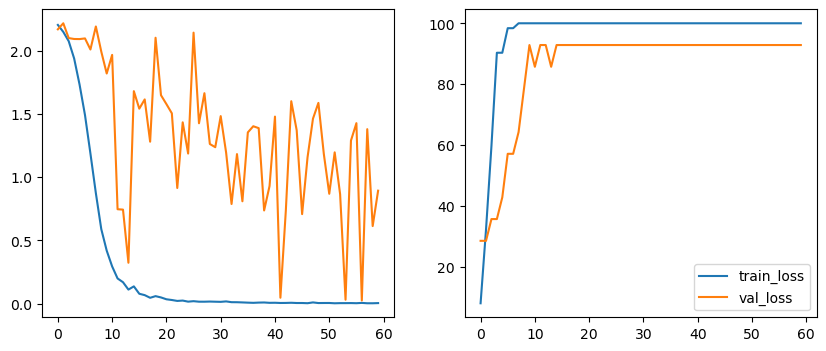

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(trainingEpoch_loss, label='train_loss')
plt.plot(validationEpoch_loss,label='val_loss')

plt.subplot(1,2,2)
plt.plot(train_acc_history, label='train_loss')
plt.plot(val_acc_history,label='val_loss')

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

x_test = torch.Tensor(x_test).to(device)
outputs = model(x_test)
_, pred = torch.max(outputs,1)
pred = pred.to('cpu')
mat= confusion_matrix(y_test,pred,labels=le.classes_)


<Axes: >

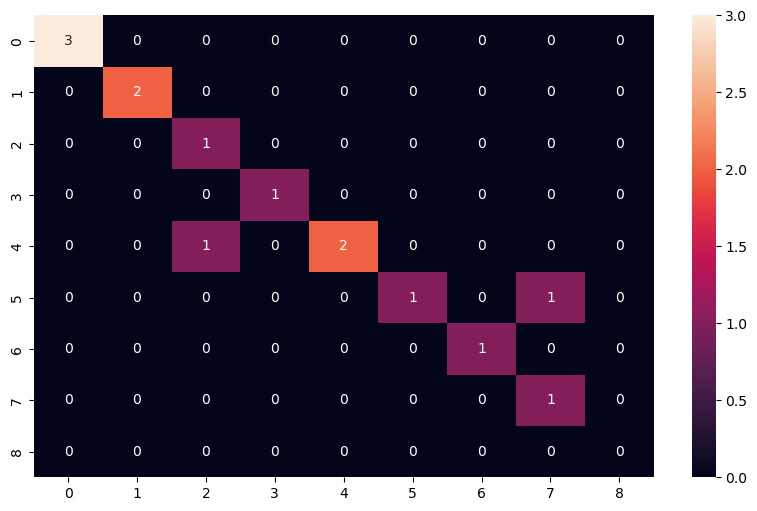

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(mat, annot= True,vmax=3)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      0.67      0.80         3
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       0.50      1.00      0.67         1

    accuracy                           0.86        14
   macro avg       0.88      0.90      0.85        14
weighted avg       0.93      0.86      0.86        14

